# Week 1

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

text= '''
One of the main issues that degrowth in general is concerned with inequality and its reduction (Hickel, 2021).Hence, distribution and the question of redistribution of wealth, income and resources have continued to resurface in the degrowth literature of (Cosme et al., 2017; Martinez- Alier, 2009; Spangenberg, 2010; Xue et al., 2012). Not so prominently discussed within degrowth, but not less relavent, is the question of money and its role for economic growth itself monetary system  as such indeed fueled the need for economic growth,i.e. if a monetary growth imperative´ existed, as some
For economic growth, if a "monetary growth imperative" exists, as some economists argue (e.g., Binswanger, 2013), there is a pressing need for analyses and proposals on how to design a monetary system that aligns better with the degrowth agenda. Given the immediate relevance of the monetary growth imperative to degrowth, one would expect that degrowth scholarship would prominently address the issue of money. The same applies to the development of concrete policies regarding district issues or monetary system design. However, there is a notable lack in this area.
Of concrete policy proposals from  the regrowth literature has been lamented
Repeatedly over the years in different contexts (Berg and Hukkinen, 2011; Bonaiutl, 2018; Demaria et al., 2013; Joutsenvirta, 2016; van den Bergh, 2011), and previous
Reviews of the degrowth literature have confirmed this on a general level to some extent (Cosme et al, 2017; Fitzpatrick et al., 2022; Sekutova et al., 2013; Vlderia et al., 2014).
In particular, a wide variety of different kinds of goals, objectives and in struments proposed in degree with has been attested, as weak as a’commonplace lack of precision in proposals (Fizpatrick el al., 2022, p. 8). One possible explanation for this lack can be
found in the relation- ship between degrowth and the state. Given the undertheorized role of the state as a central player in the degrowth transition (Demaria et al., 2019; D’Alisa and Kallis, 2020) degrowth faces “a tension between viewing the state as incapable of initiating transformational change and making a political appeal to it to do precisely this viatargeted eco-social policies” leaving “a lack in research on the strategic implications arising from conceptualizationsof the state and state-civil society relations within degrowth/postgrowth approaches” (Koch, 2020 p. 1). clusters based on similarities in conceptual vocabulary.

'''

[nltk_data] Downloading package wordnet to C:\Users\Mohamed
[nltk_data]     Elsafty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Mohamed
[nltk_data]     Elsafty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Mohamed Elsafty\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


## Frequency of the words

In [24]:
from collections import Counter
import re

text=re.sub(r'[^\w\s]', '', text.lower())

def get_frequency(text):
    words_list=text.split()
    words_freq=Counter(words_list)

    return words_freq


print(get_frequency(text))

Counter({'the': 22, 'of': 15, 'in': 12, 'and': 12, 'a': 11, 'degrowth': 10, 'al': 9, 'et': 8, 'to': 7, 'as': 7, 'monetary': 6, 'for': 5, 'growth': 5, 'is': 4, 'on': 4, 'lack': 4, 'this': 4, 'state': 4, 'one': 3, 'that': 3, 'with': 3, 'literature': 3, 'economic': 3, 'system': 3, 'imperative': 3, 'some': 3, '2013': 3, 'proposals': 3, 'issues': 2, 'general': 2, 'its': 2, 'question': 2, 'have': 2, 'cosme': 2, '2017': 2, 'not': 2, 'prominently': 2, 'within': 2, 'money': 2, 'role': 2, 'need': 2, 'if': 2, 'there': 2, 'design': 2, 'given': 2, 'would': 2, 'concrete': 2, 'policies': 2, 'from': 2, 'has': 2, 'been': 2, 'different': 2, '2011': 2, 'demaria': 2, '2022': 2, 'p': 2, 'between': 2, '2020': 2, 'main': 1, 'concerned': 1, 'inequality': 1, 'reduction': 1, 'hickel': 1, '2021hence': 1, 'distribution': 1, 'redistribution': 1, 'wealth': 1, 'income': 1, 'resources': 1, 'continued': 1, 'resurface': 1, 'martinez': 1, 'alier': 1, '2009': 1, 'spangenberg': 1, '2010': 1, 'xue': 1, '2012': 1, 'so': 1, 

## Type of the words 
* Dictionary Lookups wih WordNet
* Rule-Based Systems 
* NLTK

###### I will consider these types only : nouns, verbs, adjectives, adverbs, connectives, pronouns and prepositions.

In [29]:
def get_word_type_Wordnet(word):
    synsets = wordnet.synsets(word)
    if synsets:
        pos = synsets[0].pos()
        if pos == 'n':
            return 'Noun'
        elif pos == 'v':
            return 'Verb'
        elif pos == 'a':
            return 'Adjective'
        elif pos == 'r':
            return 'Adverb'
    return 'Other'

def get_word_type_rule_based(word):
    if word.endswith('s') or word.endswith('es'):
        return 'Noun'
    elif word.endswith('ed') or word.endswith('ing'):
        return 'Verb'
    elif word.endswith('ly'):
        return 'Adverb'
    elif word in ['the', 'a', 'an', 'and', 'but', 'or']:
        return 'Connective'
    elif word in ['he', 'she', 'it', 'they', 'we', 'you']:
        return 'Pronoun'
    elif word in ['in', 'on', 'at', 'by', 'with', 'about', 'against', 'between']:
        return 'Preposition'
    else:
        return 'Other'
    

def map_nltk_pos_to_type(pos_tag):
    if pos_tag.startswith('N'):
        return 'Noun'
    elif pos_tag.startswith('V'):
        return 'Verb'
    elif pos_tag.startswith('J'):
        return 'Adjective'
    elif pos_tag.startswith('R'):
        return 'Adverb'
    elif pos_tag in ['CC']:
        return 'Connective'
    elif pos_tag in ['PRP', 'PRP$', 'WP', 'WP$']:
        return 'Pronoun'
    elif pos_tag in ['IN']:
        return 'Preposition'
    else:
        return 'Other'
    
def get_word_type_nltk(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    nltk_dict = {word: map_nltk_pos_to_type(tag) for word, tag in pos_tags}
    return nltk_dict

dict_wordnet={}
dict_rule_based={}
dict_NLTK =get_word_type_nltk(text)
for word in text.split():
    dict_wordnet[word]=get_word_type_Wordnet(word)
    dict_rule_based[word]=get_word_type_rule_based(word)

print('Dictionary of Wordnet \n', dict_wordnet)
print('Dictionary of Rule Based System \n' , dict_rule_based)
print("Dicionary of NLTK \n", dict_NLTK)

Dictionary of Wordnet 
 {'one': 'Noun', 'of': 'Other', 'the': 'Other', 'main': 'Noun', 'issues': 'Noun', 'that': 'Other', 'degrowth': 'Other', 'in': 'Noun', 'general': 'Noun', 'is': 'Verb', 'concerned': 'Verb', 'with': 'Other', 'inequality': 'Noun', 'and': 'Other', 'its': 'Noun', 'reduction': 'Noun', 'hickel': 'Other', '2021hence': 'Other', 'distribution': 'Noun', 'question': 'Noun', 'redistribution': 'Noun', 'wealth': 'Noun', 'income': 'Noun', 'resources': 'Noun', 'have': 'Noun', 'continued': 'Verb', 'to': 'Other', 'resurface': 'Verb', 'literature': 'Noun', 'cosme': 'Other', 'et': 'Other', 'al': 'Noun', '2017': 'Other', 'martinez': 'Other', 'alier': 'Other', '2009': 'Other', 'spangenberg': 'Other', '2010': 'Other', 'xue': 'Other', '2012': 'Other', 'not': 'Adverb', 'so': 'Noun', 'prominently': 'Adverb', 'discussed': 'Verb', 'within': 'Adverb', 'but': 'Adverb', 'less': 'Adjective', 'relavent': 'Other', 'money': 'Noun', 'role': 'Noun', 'for': 'Other', 'economic': 'Adjective', 'growth': '

#### Comapring the three methods above, I think NLTK method is the most efficient one.

## Length of words

In [28]:
dict_len={}
for word in text.split():
    dict_len[word]=len(word)
print(dict_len)

{'one': 3, 'of': 2, 'the': 3, 'main': 4, 'issues': 6, 'that': 4, 'degrowth': 8, 'in': 2, 'general': 7, 'is': 2, 'concerned': 9, 'with': 4, 'inequality': 10, 'and': 3, 'its': 3, 'reduction': 9, 'hickel': 6, '2021hence': 9, 'distribution': 12, 'question': 8, 'redistribution': 14, 'wealth': 6, 'income': 6, 'resources': 9, 'have': 4, 'continued': 9, 'to': 2, 'resurface': 9, 'literature': 10, 'cosme': 5, 'et': 2, 'al': 2, '2017': 4, 'martinez': 8, 'alier': 5, '2009': 4, 'spangenberg': 11, '2010': 4, 'xue': 3, '2012': 4, 'not': 3, 'so': 2, 'prominently': 11, 'discussed': 9, 'within': 6, 'but': 3, 'less': 4, 'relavent': 8, 'money': 5, 'role': 4, 'for': 3, 'economic': 8, 'growth': 6, 'itself': 6, 'monetary': 8, 'system': 6, 'as': 2, 'such': 4, 'indeed': 6, 'fueled': 6, 'need': 4, 'growthie': 8, 'if': 2, 'a': 1, 'imperative': 10, 'existed': 7, 'some': 4, 'exists': 6, 'economists': 10, 'argue': 5, 'eg': 2, 'binswanger': 10, '2013': 4, 'there': 5, 'pressing': 8, 'analyses': 8, 'proposals': 9, 'on

In [33]:
## I will combine all above dictionaries in one dataframe 


word_frequency = get_frequency(text)
data = {
    'Frequency': [word_frequency[word] for word in word_frequency.keys()],
    'WordNet_Type': [dict_wordnet[word] for word in word_frequency.keys()],
    'Rule_Based_Type': [dict_rule_based[word] for word in word_frequency.keys()],
    'NLTK_Type': [dict_NLTK[word] for word in word_frequency.keys()],
    'Length': [dict_len[word] for word in word_frequency.keys()]
}

df = pd.DataFrame(data, index=word_frequency.keys())


df

,Frequency,WordNet_Type,Rule_Based_Type,NLTK_Type,Length
one,3,Noun,Other,Other,3
of,15,Other,Other,Preposition,2
the,22,Other,Connective,Other,3
main,1,Noun,Other,Adjective,4
issues,2,Noun,Noun,Noun,6
...,...,...,...,...,...
clusters,1,Noun,Noun,Noun,8
based,1,Verb,Verb,Verb,5
similarities,1,Noun,Noun,Noun,12
conceptual,1,Other,Other,Adjective,10


### Simple viualizations

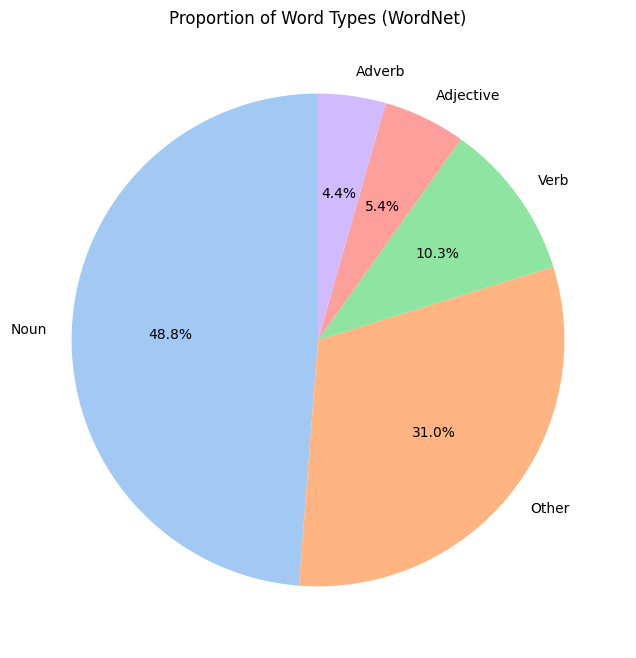

In [39]:
plt.figure(figsize=(8, 8))
word_types = df['WordNet_Type'].value_counts()
word_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Proportion of Word Types (WordNet)')
plt.ylabel('')
plt.show()

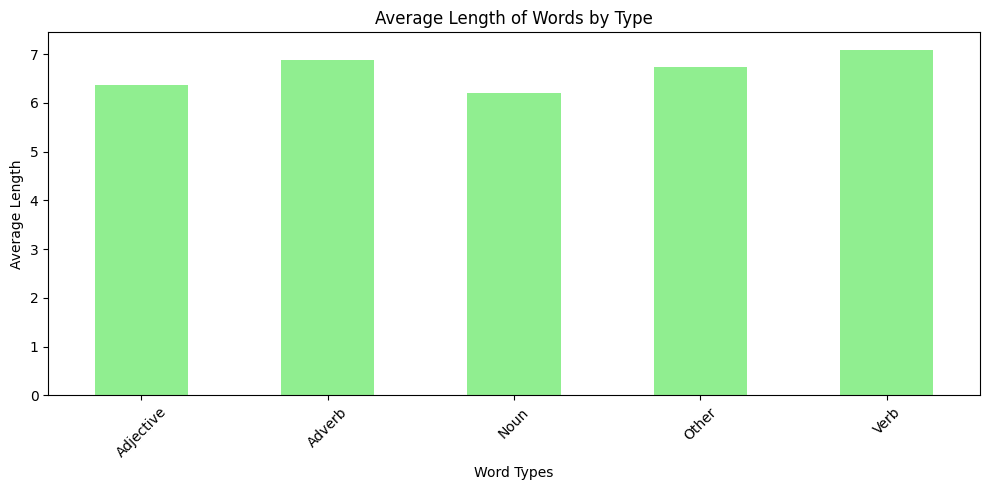

In [46]:
plt.figure(figsize=(10, 5))
average_length = df.groupby('WordNet_Type')['Length'].mean()
average_length.plot(kind='bar', color='lightgreen')
plt.title('Average Length of Words by Type')
plt.xlabel('Word Types')
plt.ylabel('Average Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()